<h1>Understanding COVID-19</h1>
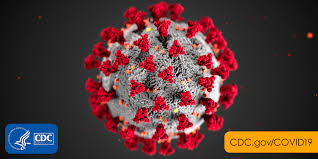
<h2>What is COVID-19</h2>
<p>Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV).

Coronavirus disease (COVID-19) is a new strain that was discovered in 2019 and has not been previously identified in humans.

Coronaviruses are zoonotic, meaning they are transmitted between animals and people.  Detailed investigations found that SARS-CoV was transmitted from civet cats to humans and MERS-CoV from dromedary camels to humans. Several known coronaviruses are circulating in animals that have not yet infected humans. 

Common signs of infection include respiratory symptoms, fever, cough, shortness of breath and breathing difficulties. In more severe cases, infection can cause pneumonia, severe acute respiratory syndrome, kidney failure and even death. 

Standard recommendations to prevent infection spread include regular hand washing, covering mouth and nose when coughing and sneezing, thoroughly cooking meat and eggs. Avoid close contact with anyone showing symptoms of respiratory illness such as coughing and sneezing.</p>

<h1>Load Packages and datasets & Getting some informations about datasets</h1>

In [ ]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from learntools.geospatial.tools import geocode
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('dark')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train_df=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-1/train.csv',parse_dates=True)
test_df=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-1/test.csv',parse_dates=True)

In [ ]:
train_df.tail()

In [ ]:
test_df.head()

In [ ]:
print('train datarame shape: ',train_df.shape)
print('test datarame shape: ',test_df.shape)

In [ ]:
train_df.info()

In [ ]:
test_df.info()

<h1>EDA</h1>

In [ ]:
pattern1='[0-9]{4}-([0-9]{2})-[0-9]{2}'
pattern2='[0-9]{4}-[0-9]{2}-([0-9]{2})'
train_df['month']=train_df['Date'].str.extract(pattern1).astype(int)
test_df['month']=test_df['Date'].str.extract(pattern1).astype(int)
train_df['day']=train_df['Date'].str.extract(pattern2).astype(int)
test_df['day']=test_df['Date'].str.extract(pattern2).astype(int)

In [ ]:
confirmed_cases=train_df.pivot_table(values='ConfirmedCases',index='Date',columns='Country/Region')

In [ ]:
countries=[]
for i in train_df['Country/Region'].unique():
    val=confirmed_cases.loc['2020-03-22',i]
    if val>1000:
        countries.append(i)
print(len(countries))

<p>20 countries from 163 have more than 1000 confirmed cases</p>

In [ ]:
fig=plt.figure(figsize=(24,24))
for i,j in zip(countries,range(20)):
    ax=fig.add_subplot(5,4,j+1)
    ax.plot(confirmed_cases.index,confirmed_cases[i])
    ax.set_xticklabels(confirmed_cases.index,rotation=90)
    ax.set_title('confirmed cases in {} from 22-1 to 22-3'.format(i))
    plt.subplots_adjust(hspace=0.8)
plt.show()

In [ ]:
confirmed_cases2=train_df.pivot_table(values='ConfirmedCases',columns='Date',index='Country/Region').sort_values('2020-03-22',ascending=False).reset_index()

In [ ]:
top_10=confirmed_cases2.head(10)
g=sns.catplot(x='Country/Region',
            y='2020-03-22',
            data=top_10,
            kind='bar')
g.fig.suptitle('confirmed cases in the top 10 countries in 22-03-2020',y=1.05)
g.set(xlabel='Country',ylabel='Confirmed Cases till 22-03-2020')
plt.xticks(rotation=90)
plt.show()

In [ ]:
safe_countries=confirmed_cases2.tail(10)
g=sns.catplot(x='Country/Region',
            y='2020-03-22',
            data=safe_countries,
            kind='bar')
g.fig.suptitle('the most safe countries in 2020-03-22',y=1.05)
plt.xticks(rotation=90)
plt.show()

In [ ]:
fig, ax=plt.subplots(figsize=(20,5))
ax.plot(confirmed_cases.index,confirmed_cases['Egypt'],color='black')
ax.set_xticklabels(confirmed_cases.index,rotation=90)
ax.set_title('confirmed cases in Egypt from 22-1 to 22-3')
plt.show()

In [ ]:
deaths=train_df.pivot_table(values='Fatalities',index='Date',columns='Country/Region')

In [ ]:
countries=[]
for i in train_df['Country/Region'].unique():
    val=deaths.loc['2020-03-22',i]
    if val>100:
        countries.append(i)
print(len(countries))

<p>4 countries from 163 have more than 100 Fatalities until 22-03</p>

In [ ]:
fig=plt.figure(figsize=(15,15))
for i,j in zip(countries,range(4)):
    ax=fig.add_subplot(2,2,j+1)
    ax.plot(deaths.index,deaths[i])
    ax.set_xticklabels(deaths.index,rotation=90)
    ax.set_title('Fatalities in {} from 22-1 to 22-3'.format(i))
    plt.subplots_adjust(hspace=0.7)
plt.show()

In [ ]:
deaths2=train_df.pivot_table(values='Fatalities',columns='Date',index='Country/Region').sort_values('2020-03-22',ascending=False).reset_index()

In [ ]:
top_10=deaths2.head(10)
g=sns.catplot(x='Country/Region',
            y='2020-03-22',
            data=top_10,
            kind='bar')
g.fig.suptitle('Fatalities in the top 10 countries in 22-03-2020',y=1.05)
g.set(xlabel='Country',ylabel='Fatalities till 22-03-2020')
plt.xticks(rotation=90)
plt.show()